# Results from WandB


## Imports

In [5]:
from community.utils.plotting import set_style
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm
import json
import seaborn as sns
import pandas as pd
import numpy.linalg as LA
from itertools import product
import ipywidgets as widgets
import os


In [6]:
from community.utils.heatmap import compute_and_plot_heatmap, compute_and_plot_colormesh
from community.data.datasets.mnist import estimate_covariance


In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Results

In [8]:
local_save = True


sweep_id = "8svrrgfg"

if not local_save:

    try:
        total_data = pd.read_pickle(f"../../results/sweep_tables/{sweep_id}")
    except FileNotFoundError:
        total_data = pd.read_pickle(
            f"../../results/sweep_tables/MetricResults_{sweep_id}"
        )
else:
    try:
        total_data = pd.read_pickle(
            f"/mnt/storage/gb21/community/compiled_wandb_results/{sweep_id}/metric_table"
        )
    except FileNotFoundError:
        total_data = pd.read_pickle(
            f"/mnt/storage/gb21/community/compiled_wandb_results/{sweep_id}/metric_table_safe"
        )
p = total_data["sparsity"]
total_data["q_metric"] = 0.5 * (1 - p) / (1 + p)
total_data["n_conns"] = (
    (total_data["n_hidden"] ** 2 * total_data["sparsity"]).round().astype(int)
)
total_data

metrics = [
    "retraining_det_col_norm",
    "ablations_det_col_norm",
    "correlations_det_col_norm",
]

total_data["mean_global_diff"] = total_data[metrics].mean(1)
# total_data['covariance'] = 1 / total_data['cov_ratio']
total_data["n_classes"] = [
    {"double_digits": 10, "double_letters": 16}[d] for d in total_data["data_type"]
]

covariances = {}
for n in total_data["n_classes"].unique():
    for c in total_data["cov_ratio"].unique():
        covariances[n, c] = estimate_covariance(c, int(n))
total_data["covariance"] = [
    covariances[n, c] for c, n in total_data[["cov_ratio", "n_classes"]].values
]

In [199]:
sparsities = lambda n : np.concatenate(
        [
            np.array([0]),
                (np.geomspace(1, n**2, 30, endpoint=True, dtype=int) / n**2).round(
                    4
                )
        ]
    )

s_index = lambda n, s : sparsities(n).tolist().index(s)

In [203]:
np.unique(sparsities(100)).shape

(29,)

In [172]:
s_index(10, 0.14)

11

In [170]:
s_indexs = {}
for n in total_data["n_hidden"].unique():
    for s in total_data[total_data['n_hidden'] == n]["sparsity"].unique():
        print(s)
        s_indexs[n, s] = s_index(n, s)

0.0
0.01
0.02
0.03
0.04
0.06
0.08
0.1
0.14
0.18
0.24
0.32
0.43
0.57
0.75
1.0
0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.09
0.11
0.13
0.16
0.2
0.24
0.29
0.36
0.44
0.54
0.66
0.81
1.0
0.0
0.01
0.02
0.03
0.05
0.06
0.08
0.1
0.13
0.16
0.21
0.28
0.36
0.46
0.6
0.77
1.0
0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.08
0.09
0.11
0.13
0.16
0.19
0.23
0.28
0.33
0.4
0.48
0.58
0.69
0.83
1.0
0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.08
0.11
0.14
0.19
0.25
0.33
0.43
0.57
0.76
1.0
0.0
0.01
0.02
0.03
0.04
0.05
0.07
0.08
0.09
0.12
0.14
0.17
0.2
0.24
0.28
0.34
0.41
0.49
0.59
0.7
0.83
1.0
0.0
0.01
0.02
0.03
0.04
0.05
0.07
0.1
0.13
0.17
0.23
0.31
0.42
0.56
0.75
1.0
0.0
0.01
0.02
0.03
0.04
0.05
0.07
0.08
0.11
0.13
0.17
0.21
0.26
0.32
0.41
0.51
0.64
0.8
1.0
0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.09
0.1
0.12
0.14
0.17
0.2
0.23
0.28
0.32
0.38
0.45
0.52
0.62
0.72
0.85
1.0
0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.09
0.12
0.16
0.22
0.3
0.4
0.54
0.74
1.0
0.0
0.01
0.02
0.03
0.04
0.05
0.07
0.08
0.1
0.12
0.14
0.18
0.21
0.26
0.32
0.38
0.46


In [173]:
s_indexs

{(61, 0.0): 0,
 (61, 0.01): 2,
 (61, 0.02): 3,
 (61, 0.03): 4,
 (61, 0.04): 5,
 (61, 0.06): 6,
 (61, 0.08): 7,
 (61, 0.1): 8,
 (61, 0.14): 9,
 (61, 0.18): 10,
 (61, 0.24): 11,
 (61, 0.32): 12,
 (61, 0.43): 13,
 (61, 0.57): 14,
 (61, 0.75): 15,
 (61, 1.0): 16,
 (19, 0.0): 0,
 (19, 0.01): 2,
 (19, 0.02): 3,
 (19, 0.03): 4,
 (19, 0.04): 5,
 (19, 0.05): 6,
 (19, 0.06): 7,
 (19, 0.07): 8,
 (19, 0.09): 9,
 (19, 0.11): 10,
 (19, 0.13): 11,
 (19, 0.16): 12,
 (19, 0.2): 13,
 (19, 0.24): 14,
 (19, 0.29): 15,
 (19, 0.36): 16,
 (19, 0.44): 17,
 (19, 0.54): 18,
 (19, 0.66): 19,
 (19, 0.81): 20,
 (19, 1.0): 21,
 (42, 0.0): 0,
 (42, 0.01): 2,
 (42, 0.02): 3,
 (42, 0.03): 4,
 (42, 0.05): 5,
 (42, 0.06): 6,
 (42, 0.08): 7,
 (42, 0.1): 8,
 (42, 0.13): 9,
 (42, 0.16): 10,
 (42, 0.21): 11,
 (42, 0.28): 12,
 (42, 0.36): 13,
 (42, 0.46): 14,
 (42, 0.6): 15,
 (42, 0.77): 16,
 (42, 1.0): 17,
 (14, 0.0): 0,
 (14, 0.01): 1,
 (14, 0.02): 2,
 (14, 0.03): 3,
 (14, 0.04): 4,
 (14, 0.05): 5,
 (14, 0.06): 6,
 (14, 0.

In [174]:
total_data["s_index"] = [
    s_indexs[n, s] for s, n in total_data[["sparsity", "n_hidden"]].values
]

In [175]:
total_data['s_index'].unique()

array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21,  1, 22, 23])

In [176]:
def filter_data(data, v_params):
    data = data.copy()
    for key, value in v_params.items():
        if isinstance(value, list):
            filter = np.sum([data[key] == v for v in value], axis=0).astype(bool)
            data = data[filter]
        else:
            if value is None:
                data = data[data[key].isnull()]
            else:
                data = data[data[key] == value]

    return data


def get_values(data, x="n_hidden", y="sparsity", value="retraining_global_diff"):
    return data[[x, y, value]].values.T


def get_all_v_params(varying_params, excluded_params={}):
    return [
        {
            k: p
            for k, p in zip(varying_params.keys(), params)
            if k not in excluded_params
        }
        for params in product(*varying_params.values())
    ]


params = ["common_readout", "n_bot", "common_input", "task", "Step", "cov_ratio"]


varying_params = {}
for param in params:
    if param in total_data.columns:
        varying_params[param] = total_data[param].unique().tolist()
        try:
            varying_params[param] = sorted(varying_params[param])
            varying_params[param] = [
                v if not np.isnan(v) else None for v in varying_params[param]
            ]
        except TypeError:
            pass


heatmap_params = ["n_hidden", "sparsity", "cov_ratio", "n_conns"]

In [10]:
total_data["mult"] = total_data["retraining_global_diff"] * total_data["best_acc"]


## Plot Interactive Sweep Results

In [7]:
varying_params_all = get_all_v_params(varying_params)


def plot_fn(**params):

    plot_type = params.pop("plot_type")
    metric = params.pop("metric_to_plot")
    smoothness = params.pop("smoothness")
    log_scale = params.pop("log_scale")
    x, y = params.pop("x"), params.pop("y")

    v_params = {k: v for k, v in params.items()}
    print(v_params)
    # print(v_params)
    excluded_params = {"Step", "task"}
    v_params_filered = {k: v for k, v in params.items() if k not in excluded_params}
    legend_params = {k: v for k, v in v_params_filered.items() if len(v) != 1}

    tasks, steps = v_params["task"], v_params["Step"]

    n_tasks = len(tasks)
    n_steps = len(steps)

    v_params_all = get_all_v_params(v_params_filered)
    legend_params_all = get_all_v_params(legend_params)

    if plot_type == "grad_spec":
        pass

    else:
        for s, step in enumerate(steps):

            v_p1 = len(v_params_filered)
            v_p2 = max([len(v) for v in v_params_filered.values()])

            n_params = len(v_params_all)
            n1 = int(np.sqrt(n_params))
            n2 = n_params // n1

            if n1 * n2 < n_params:
                n2 += 1

            # print(n1, n2)

            fig = plt.figure(
                constrained_layout=True, figsize=(5 * n2, 5 * n1 * n_tasks)
            )

            fig.suptitle(f"Functional Specialization on step {step}")

            # create 3x1 subfigs
            subfigs = fig.subfigures(nrows=n_tasks, ncols=1)
            if n_tasks == 1:
                subfigs = [subfigs]

            Zs = []

            for t, (subfig, task) in enumerate(zip(subfigs, tasks)):

                subfig.suptitle(f"Task :  {task}")

                # create subplots per subfig

                axs = subfig.subplots(nrows=n1, ncols=n2)

                try:
                    axs[0]
                except TypeError:
                    axs = np.array([axs])
                for i, (ax, v_param, l_param) in enumerate(
                    zip(axs.flatten(), v_params_all, legend_params_all)
                ):

                    filter_param = v_param.copy()
                    filter_param["Step"] = step
                    filter_param["task"] = task
                    data = filter_data(
                        total_data[total_data["sparsity"] != 0], filter_param
                    )

                    argmins = (
                        data[metric].values.argsort()[:10],
                        data[metric].values.argsort()[-10:],
                    )
                    minmax = [data[metric].values[idxs].mean() for idxs in argmins]
                    # print(minmax)
                    # print(data.shape)
                    values = get_values(data, x, y, metric)

                    print(data.shape)

                    if 0 not in data.shape:
                        if plot_type == "heatmap":

                            (
                                (X, Y),
                                (X_mesh, Y_mesh),
                                Z,
                                sigmas,
                                *_,
                            ) = compute_and_plot_heatmap(
                                values,
                                (fig, ax),
                                log_scale=log_scale,
                                plot_f=False,
                                random=False,
                                minmax=None,
                                smoothness=smoothness,
                            )
                        elif plot_type == "scipy":
                            (
                                X_mesh,
                                Y_mesh,
                                Z,
                                (fig, ax),
                                cbar,
                            ) = compute_and_plot_colormesh(
                                values, (fig, ax), log_scale=log_scale
                            )

                        elif plot_type == "table":

                            grouped_values = data.groupby([x, y])[metric].mean()

                            x_values = data[x].unique()[::-1]
                            y_values = data[y].unique()
                            y_values_per_x = data.groupby(x)[y].unique()

                            # Z = np.array([[grouped_values[x][y] for y in y_values_per_x[x]] for x in x_values]).T
                            Z = pd.concat([grouped_values[x] for x in x_values], axis=1)
                            Z.columns = x_values

                            # print(Z)

                            im = ax.imshow(Z)
                            ax.set_xticks(range(len(x_values)))
                            ax.set_xticklabels(x_values.astype(str))
                            if y == "cov_ratio":
                                ax.set_yticks(range(len(y_values)))
                                ax.set_yticklabels(y_values.astype(str))
                            ax.set_xlabel(x)
                            ax.set_ylabel(y)
                            fig.colorbar(im, ax=ax)

                        Zs.append(Z)

                    ax.set_title((str(l_param).strip("{}").replace(",", "\n")))

In [8]:
params_widgets = {
    k: widgets.SelectMultiple(
        options=[p for p in params], description=k, disabled=False, value=[params[0]]
    )
    for k, params in varying_params.items()
    if (len(params) > 1 or k == "task")
}

params_widgets["smoothness"] = widgets.FloatSlider(7, min=0.5, max=10, step=0.2)
# params_widgets['epoch'] = widgets.IntSlider(nb_epochs-1, min=0, max=nb_epochs-1)
params_widgets["log_scale"] = widgets.Dropdown(options=[False, True])

params_widgets["plot_type"] = widgets.Dropdown(
    options=["heatmap", "scipy", "table"],
    description="Plot Type",
    disabled=False,
    manual=True,
    auto_display=False,
)

params_widgets["metric_to_plot"] = widgets.Dropdown(
    options=[
        "retraining_global_diff",
        "ablations_global_diff",
        "correlations_global_diff",
        "best_acc",
        "mult",
        "mean_global_diff",
    ],
    description="Metric to plot",
    disabled=False,
    manual=True,
    auto_display=False,
)

params_widgets["x"] = widgets.Dropdown(
    options=heatmap_params[:-1],
    description="x-axis",
    disabled=False,
    manual=True,
    auto_display=False,
)

params_widgets["y"] = widgets.Dropdown(
    options=heatmap_params[1:],
    description="y-axis",
    disabled=False,
    manual=True,
    auto_display=False,
)
interactive_plot = widgets.interactive(plot_fn, **params_widgets)

In [50]:
display(interactive_plot)


interactive(children=(SelectMultiple(description='common_readout', index=(1,), options=(False, True), value=(T…

## Paper Figures

### Heatmap

In [11]:
varying_params


{'common_readout': [False, True],
 'n_bot': [None, 5],
 'common_input': [False, True],
 'task': ['family', 'parity-digits-both'],
 'Step': ['0', 'last', 'mid-'],
 'cov_ratio': [0.01, 0.26, 0.5, 0.75, 1.0]}

(20610, 37)
(23000, 37)


KeyboardInterrupt: 

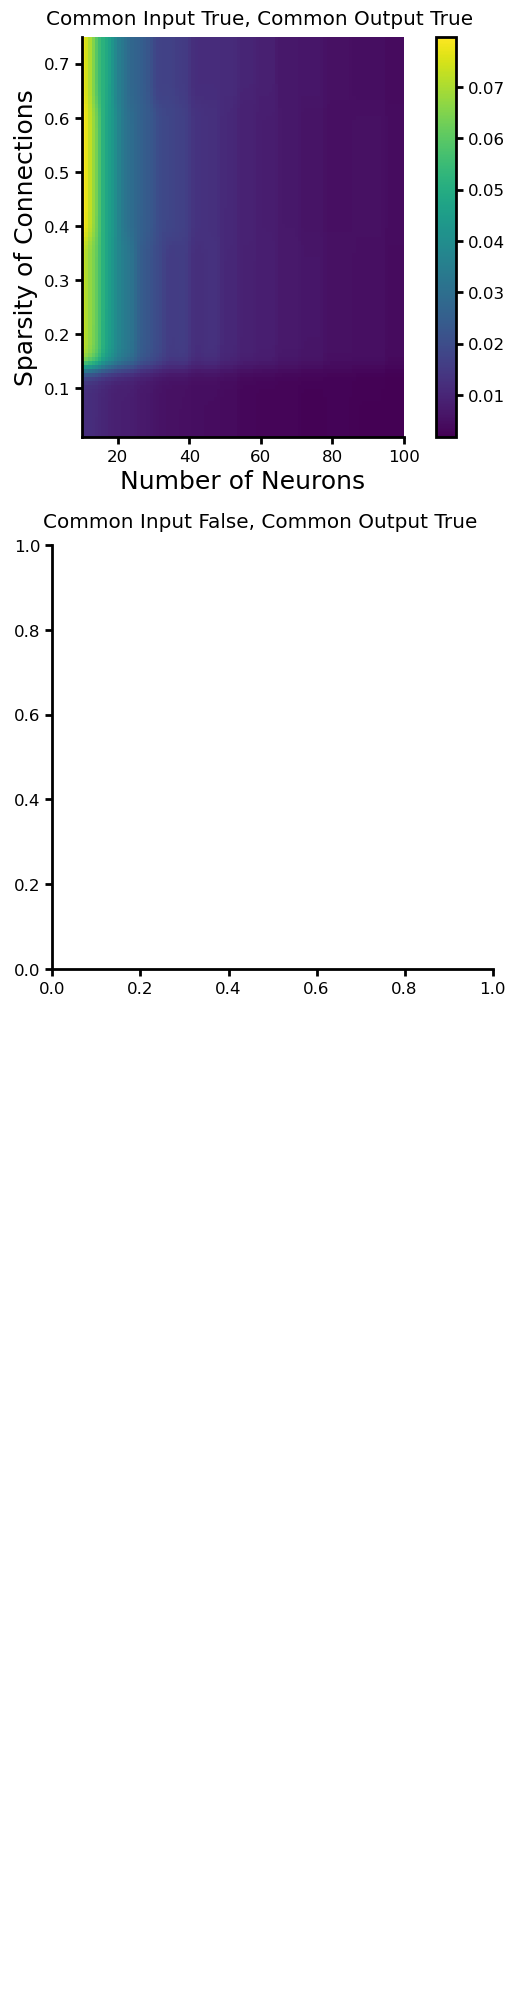

In [12]:
set_style()


plot_type = "heatmap"
log_scale = False

metrics = [
    "retraining_det_col_norm",
    # "correlations_det_col_norm",
    # "ablations_det_col_norm",
]
# metrics = ['mean_global_diff']
# metrics = [
#    "retraining_global_diff",
#    "ablations_global_diff",
#    "correlations_global_diff",
# ]

fig = plt.figure(constrained_layout=True, figsize=(len(metrics) * 5, 5 * 4))
# fig.suptitle('Metrics Slices')
subfigs = fig.subfigures(nrows=4, ncols=1)
try:
    subfigs[0]
except TypeError:
    subfigs = [subfigs]

for m, (subfig, [c_r, c_i]) in enumerate(
    zip(subfigs.flatten(), product([True, False], repeat=2))
):
    # for m, subfig in enumerate(subfigs):
    axs = subfig.subplots(nrows=1, ncols=len(metrics))
    try:
        axs[0]
    except TypeError:
        axs = [axs]
    for i, ax in enumerate(axs):

        c_data = filter_data(
            total_data,
            {
                "Step": "last",
                "common_input": c_i,
                "common_readout": c_r,
                "n_bot": None,
                "task": ["parity-digits-both", "family"][0],
                "cov_ratio": varying_params["cov_ratio"][:-1],
            },
        )

        if 0 in c_data.shape:
            continue

        subfig.suptitle(f"Common Input {c_i}, Common Output {c_r}")

        c_data = c_data[c_data["sparsity"] != 0]
        print(c_data.shape)

        x = "n_hidden"
        y = "cov_ratio"

        values = get_values(c_data, x, y, metrics[i])
        # values[1] = np.sqrt(values[1])

        if plot_type == "heatmap":

            ((X, Y), (X_mesh, Y_mesh), Z, sigmas, *_,) = compute_and_plot_heatmap(
                values,
                (fig, ax),
                log_scale=log_scale,
                plot_f=False,
                random=False,
                smoothness=2,
                minmax=None,
            )

        elif plot_type == "scipy":
            (
                X_mesh,
                Y_mesh,
                Z,
                (fig, ax),
                cbar,
            ) = compute_and_plot_colormesh(values, (fig, ax), log_scale=log_scale)

        ax.set_xlabel(x)
        ax.set_ylabel(y)

        # ax.set_title(metrics[i])

        ax.set_ylabel("Sparsity of Connections")
        # ax.set_yticklabels(ax.get_yticklabels()[::-1])
        ax.set_xlabel("Number of Neurons")

(25180, 37)
(23830, 37)


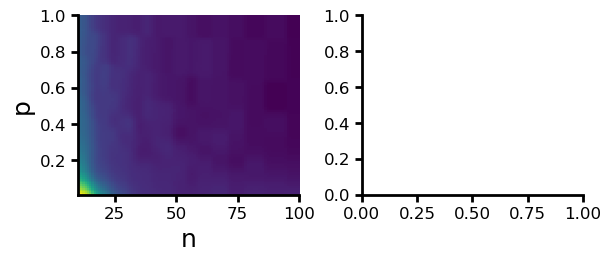

In [130]:
fig, axs = plt.subplots(1, 2, figsize=(6, 2.5), constrained_layout=True)
plot_type = "heatmap"
c_data = filter_data(
    total_data,
    {
        "Step": "last",
        "common_input": False,
        "common_readout": False,
        "n_bot": None,
        "task": ["parity-digits-both", "family"][0],
        "cov_ratio": varying_params["cov_ratio"][:-1],
    },
)

print(c_data.shape)
assert 0 not in c_data.shape

c_data = c_data[c_data["sparsity"] != 0]
print(c_data.shape)

x = "n_hidden"

for m, (ax, y) in enumerate(zip(axs, ["sparsity"])):

    values = get_values(c_data, x, y, metrics[0])
    # values[1] = np.sqrt(values[1])

    if plot_type == "heatmap":

        ((X, Y), (X_mesh, Y_mesh), Z, sigmas, *_, cbar) = compute_and_plot_heatmap(
            values,
            (fig, ax),
            log_scale=log_scale,
            plot_f=False,
            random=False,
            smoothness=2.5,
            minmax=None,
            cbar=m != 0,
        )

    elif plot_type == "scipy":
        (X_mesh, Y_mesh, Z, (fig, ax), cbar,) = compute_and_plot_colormesh(
            values, (fig, ax), log_scale=log_scale, cbar=m != 0
        )

    ax.set_xlabel(x)
    ax.set_ylabel(y)

    # ax.set_title(metrics[i])

    if y == "sparsity":
        ax.set_ylabel("p")
    elif y == "covariance":
        ax.set_ylabel("c")
    # ax.set_yticklabels(ax.get_yticklabels()[::-1])
    ax.set_xlabel("n")
    try : 
        cbar.set_label('FS')
    except AttributeError : 
        pass

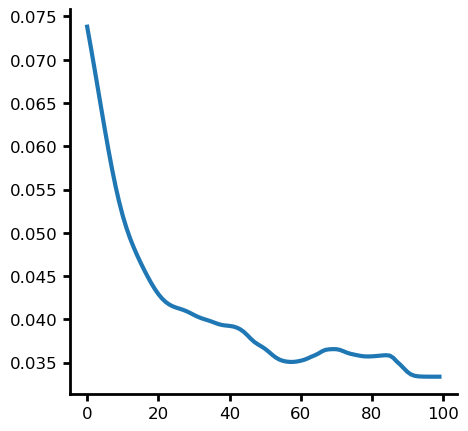

In [134]:
plt.plot(Z.mean(1))

In [21]:
varying_params["cov_ratio"]

[0.01, 0.26, 0.5, 0.75, 1.0]

In [37]:
[estimate_covariance(c, 10) for c in varying_params["cov_ratio"]]

[0.9088479652197782,
 0.21595696364100525,
 0.07999505951266446,
 0.02742507930566604,
 -0.000255519816973002]

In [89]:
fig.savefig("../../results/imgs/heatmaps.svg")


### Q Metric

In [92]:
uniques = sorted(total_data["n_hidden"].unique().tolist())

In [94]:
c_data = filter_data(
    total_data,
    {
        "Step": "last",
        "common_input": False,
        "common_readout": False,
        # "n_bot": 5,
        # "task": "family",
        #"n_hidden": [49],
        "cov_ratio": 0.75,
    },
)
c_data.shape

(7390, 37)

In [95]:
c_data[c_data["sparsity"] == 0]["best_acc"].mean()

0.5672439

In [ ]:
((X, Y), (X_mesh, Y_mesh), Z, sigmas, *_, cbar) = compute_and_plot_heatmap(
            values,
            (fig, ax),
            log_scale=log_scale,
            plot_f=False,
            random=False,
            smoothness=2.5,
            minmax=None,
            cbar=m != 0,
        )

In [43]:
metrics = [
    "retraining_global_diff",
    "ablations_global_diff",
    "correlations_global_diff",
]

plot_data = {"q_metric": [], "metric_value": [], "metric_name": []}

for metric in metrics:
    plot_data["metric_value"].append(c_data[metric])
    plot_data["q_metric"].append(c_data["q_metric"])
    plot_data["metric_name"].append(np.full(len(c_data), metric, dtype=object))

plot_data = pd.DataFrame.from_dict({k: np.concatenate(v) for k, v in plot_data.items()})

In [67]:
uniques[-8:]


[51, 56, 61, 68, 74, 82, 90, 100]

(2080, 38)
(2690, 38)
(2500, 38)
(2910, 38)


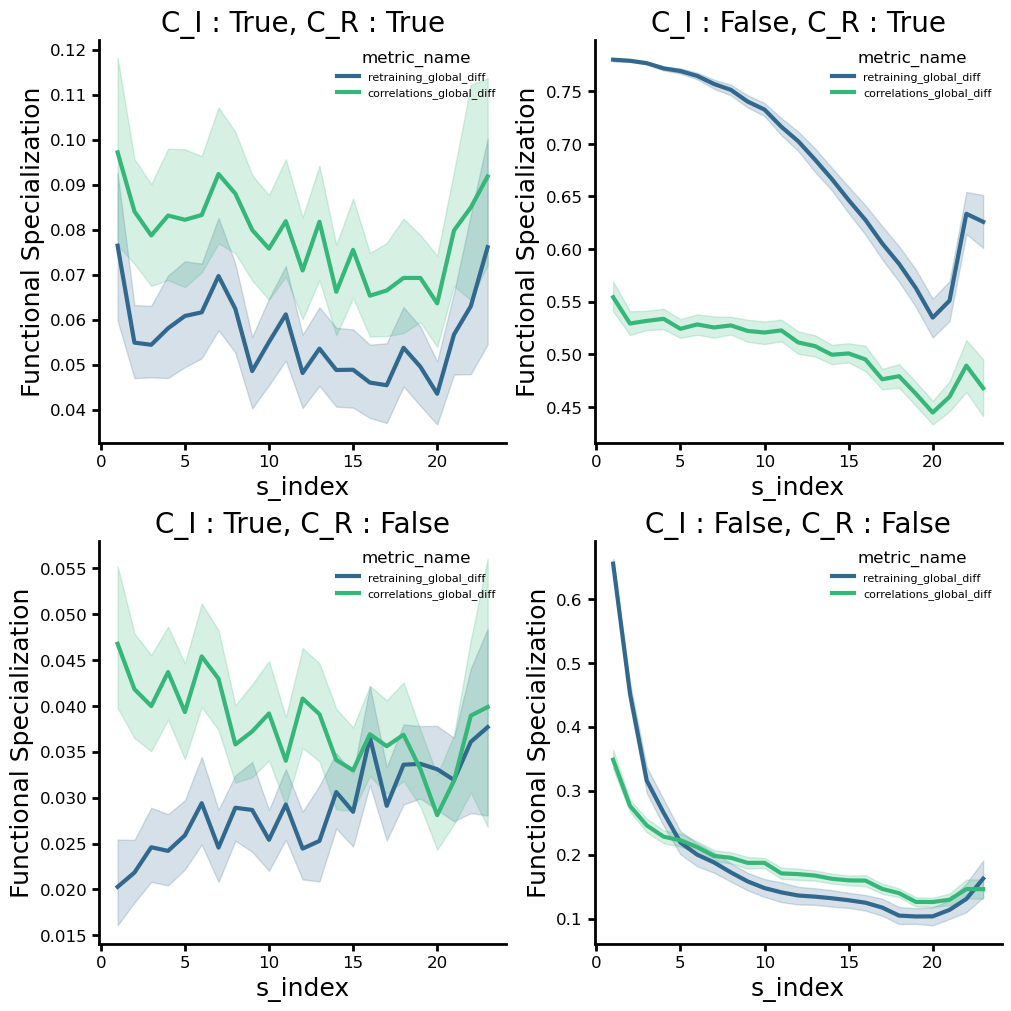

In [178]:
set_style()

smooth = False


fig, axs = plt.subplots(2, 2, figsize=(10, 10), constrained_layout=True)

for ax, [c_r, c_i] in zip(axs.flatten(), product([True, False], repeat=2)):

    c_data = filter_data(
        total_data,
        {
            "Step": "last",
            "common_input": c_i,
            "common_readout": c_r,
            "n_bot": None,
            "task": "parity-digits-both",
            "n_hidden": uniques[:10],
            "cov_ratio": 0.75,
        },
    )
    c_data = c_data[c_data["sparsity"] != 0]
    print(c_data.shape)

    metrics = [
        "retraining_global_diff",
        # "ablations_global_diff",
        "correlations_global_diff",
    ]

    # metrics = ['mean_global_diff']

    keys = [
        "metric_value",
        "metric_name",
        "sparsity",
        "n_hidden",
        "q_metric",
        "n_conns",
        's_index'
    ]
    plot_data = {k: [] for k in keys}
    smooth_data = {k : [] for k in keys[:2]}

    x = "s_index"

    for metric in metrics:
        plot_data["metric_value"].append(c_data[metric])
        plot_data["metric_name"].append(np.full(len(c_data), metric, dtype=object))
        
        values = get_values(c_data, 'n_hidden', x, metric)

        if smooth : 
                
            ((X, Y), (X_mesh, Y_mesh), Z, sigmas, *_, cbar) = compute_and_plot_heatmap(
                values,
                (fig, ax),
                log_scale=log_scale,
                plot_f=False,
                random=False,
                smoothness=1,
                minmax=None,
                cbar=m != 0,
                plot=False
            )

            smooth_data["metric_value"].append(Z.mean(0))
            smooth_data["metric_name"].append(np.full(len(Y), metric, dtype=object))
            smooth_data.setdefault(x, [])
            smooth_data[x].append(Y)


        for k in keys[2:]:
            plot_data[k].append(c_data[k])

    plot_data = pd.DataFrame.from_dict(
        {k: np.concatenate(v) for k, v in plot_data.items()}
    )

    if smooth : 
        smooth_data = pd.DataFrame.from_dict(
        {k: np.concatenate(v) for k, v in smooth_data.items()}
    )

            
    sns.lineplot(
        data=smooth_data if smooth else plot_data,
        x=x,
        y="metric_value",
        hue="metric_name",
        ax=ax,
        palette="viridis",
        estimator="mean",
    )
        

    # ax.set_yscale('log')
    ax.set_ylabel("Functional Specialization")
    ax.set_xlabel(x)
    if x == "s_index":
        ax.set_xticks([0, ])        
        ax.set_xticklabels()
        # ax.set_xscale("log")
    ax.set_title(f"C_I : {c_i}, C_R : {c_r}")

In [180]:
total_data['s_index'].max()

23

In [188]:
len(total_data[total_data['n_hidden'] == 15]['s_index'].unique())

0

In [153]:
np.nanmean(Z, axis=1)

/tmp/ipykernel_114052/2355230463.py:1: RuntimeWarning: Mean of empty slice
  np.nanmean(Z, axis=1)


array([0.04778032, 0.04055911, 0.03420347, 0.02887096, 0.03582976,
       0.04494883, 0.04116831, 0.02947095, 0.02919216, 0.0227807 ,
       0.02807534, 0.02846604, 0.03038242, 0.02468185, 0.02147829,
       0.02112028, 0.02083967, 0.01658926, 0.02326877, 0.02309281,
       0.02302111, 0.0228907 , 0.02275802, 0.02356714, 0.02192637,
       0.02059557, 0.02042262, 0.02024513, 0.02003731, 0.01985327,
       0.0196775 , 0.01947381, 0.01929311, 0.01824523, 0.02035466,
       0.01999589, 0.01978811, 0.01957405, 0.01934941, 0.0191183 ,
       0.01889366, 0.01867961, 0.01847182, 0.01826657, 0.01806208,
       0.01979169, 0.02318561, 0.0235174 , 0.02335767, 0.02316584,
       0.02293488, 0.02276475, 0.02258363, 0.02235254, 0.02217141,
       0.02200129, 0.02177033, 0.02157849, 0.02141876, 0.0211882 ,
       0.01908588,        nan,        nan,        nan,        nan,
       0.01456114, 0.0145285 , 0.01455007, 0.01457161, 0.01459324,
       0.01461513, 0.01463769, 0.01466136, 0.01468571, 0.01470

In [145]:
c_data[c_data['sparsity'] == 0]

,Step,best_acc,sparsity,data_type,ag_dropout,n_bot,task,cov_ratio,common_input,common_readout,...,ablations_0_local_diff,ablations_1_local_diff,seed,name,q_metric,n_conns,mean_global_diff,n_classes,covariance,mult
2,last,0.579026,0.0,double_digits,0,None,parity-digits-both,0.75,False,False,...,0.958537,-0.969103,42,bdbzi8au,0.5,0,0.664377,10,0.035168,0.455280
2,last,0.582081,0.0,double_digits,0,None,parity-digits-both,0.75,False,False,...,0.965010,-0.957553,42,bdbzi8au,0.5,0,0.666138,10,0.035168,0.458609
2,last,0.570162,0.0,double_digits,0,None,parity-digits-both,0.75,False,False,...,0.998286,-0.972286,42,bdbzi8au,0.5,0,0.671429,10,0.035168,0.454561
2,last,0.582632,0.0,double_digits,0,None,parity-digits-both,0.75,False,False,...,0.975804,-0.982321,42,bdbzi8au,0.5,0,0.676187,10,0.035168,0.456126
2,last,0.562801,0.0,double_digits,0,None,parity-digits-both,0.75,False,False,...,0.968032,-0.987569,42,bdbzi8au,0.5,0,0.679058,10,0.035168,0.445674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,last,0.570713,0.0,double_digits,0,None,parity-digits-both,0.75,False,False,...,0.984183,-0.978627,3,x2q1wmq5,0.5,0,0.668764,10,0.035168,0.445828
2,last,0.586538,0.0,double_digits,0,None,parity-digits-both,0.75,False,False,...,0.946015,-0.981023,3,x2q1wmq5,0.5,0,0.664389,10,0.035168,0.463692
2,last,0.582182,0.0,double_digits,0,None,parity-digits-both,0.75,False,False,...,0.965680,-0.990485,3,x2q1wmq5,0.5,0,0.672624,10,0.035168,0.460432
2,last,0.584235,0.0,double_digits,0,None,parity-digits-both,0.75,False,False,...,0.983180,-0.973540,3,x2q1wmq5,0.5,0,0.664761,10,0.035168,0.458240


In [137]:

Y

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [127]:
Z

array([[0.15576801, 0.15577498, 0.15578195, ..., 0.15643939, 0.15644627,
        0.15645314],
       [0.15576801, 0.15577498, 0.15578195, ..., 0.15643939, 0.15644627,
        0.15645314],
       [0.15576801, 0.15577498, 0.15578195, ..., 0.15643939, 0.15644627,
        0.15645314],
       ...,
       [0.15576801, 0.15577498, 0.15578195, ..., 0.15643939, 0.15644627,
        0.15645314],
       [0.15576801, 0.15577498, 0.15578195, ..., 0.15643939, 0.15644627,
        0.15645314],
       [0.15576801, 0.15577498, 0.15578195, ..., 0.15643939, 0.15644627,
        0.15645314]])

In [120]:
{k : len(np.concatenate(v)) for k, v in smooth_data.items()}

{'metric_value': 200, 'metric_name': 8960, 'q_metric': 200}

In [116]:
np.concatenate(smooth_data['metric_name'])

array(['retraining_global_diff', 'retraining_global_diff',
       'retraining_global_diff', ..., 'correlations_global_diff',
       'correlations_global_diff', 'correlations_global_diff'],
      dtype=object)

In [66]:
from scipy.stats import gaussian_kde


In [384]:
fig.savefig("../../results/imgs/q_metric.svg")


### Spec Gradient

In [58]:
uniques


[10,
 11,
 12,
 13,
 14,
 16,
 17,
 19,
 21,
 23,
 26,
 28,
 31,
 34,
 38,
 42,
 46,
 51,
 56,
 61,
 68,
 74,
 82,
 90,
 100]

In [59]:
c_data = filter_data(
    total_data,
    {
        "common_input": False,
        "common_readout": True,
        "n_bot": None,
        "task": "parity-digits-both",
        "cov_ratio": 0.75,
        "n_hidden": [38, 42, 46],
    },
)
print(c_data.shape)

c_data = c_data[c_data["sparsity"] != 0]

(2100, 35)


In [60]:
steps = c_data["Step"].unique().tolist()
agents = ["0", "1", "all"]
agents = [agents[0]] * len(steps) + [agents[-1]] + [agents[1]] * len(steps)
all_steps = steps + [steps[-1]] + steps[::-1]

ts = np.arange(len(steps))
ts = np.concatenate((ts, np.array([-1]), np.flip(ts)))
ags = np.concatenate(
    (np.zeros(len(steps)), np.array([-1]), np.ones(len(steps)))
).astype(int)


In [61]:
plot_data = {k: [] for k in ["x", "ag", "step", "metric", "sparsity", "n_conns"]}

for x, (step, ag) in enumerate(zip(all_steps, agents)):

    metric = c_data[c_data["Step"] == step][f"retraining_{ag}_local_diff"]
    plot_data["x"].append(np.full_like(metric, x, dtype=int))
    plot_data["step"].append(np.full_like(metric, step, dtype=object))
    plot_data["ag"].append(np.full_like(metric, ag, dtype=object))
    plot_data["metric"].append(metric)
    plot_data["sparsity"].append(c_data[c_data["Step"] == step]["sparsity"])
    plot_data["n_conns"].append(c_data[c_data["Step"] == step]["n_conns"])

plot_data = pd.DataFrame.from_dict({k: np.concatenate(v) for k, v in plot_data.items()})
local_diffs = [
    c_data[c_data["Step"] == s][f"retraining_{ag}_local_diff"]
    for s, ag in zip(steps, ags)
]


/tmp/ipykernel_113730/83384482.py:28: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = ax.figure.colorbar(sm, orientation="vertical")


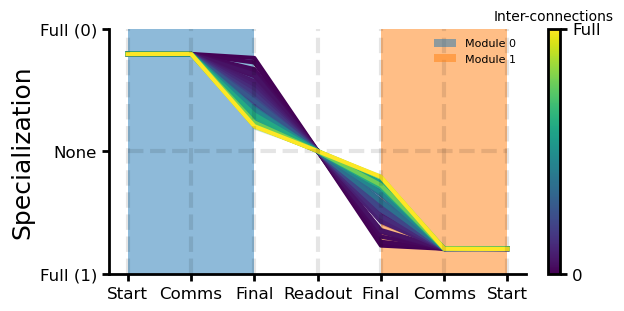

In [63]:
fig, ax = plt.subplots(figsize=(6, 3), constrained_layout=True)
sns.lineplot(
    plot_data, x="x", y="metric", hue="sparsity", palette="viridis", ax=ax, legend=False
)
x = plot_data["x"].unique()

steps_label = ["Start", "Comms", "Final"]
x_labels = [f"{steps_label[t]}" for t in ts]
x_labels[len(steps)] = "Readout"
ax.set_xticks(x)
ax.set_xticklabels(labels=x_labels)
ax.set_ylim(-1, 1)
ax.set_ylabel("Specialization")
ax.set_yticks([-1, 0, 1], ["Full (1)", "None", "Full (0)"])
ax.hlines(0, x[0], x[-1], linestyles="--", colors="black", alpha=0.1)
ax.vlines(x, -1, 1, linestyles="--", colors="black", alpha=0.1)
ax.fill_betweenx(
    [-len(steps), len(steps)], 0, len(steps) - 1, alpha=0.5, label="Module 0"
)
ax.fill_betweenx(
    [-len(steps), len(steps)], len(steps) + 1, x[-1], alpha=0.5, label="Module 1"
)
ax.set_xlabel("")
ax.legend()

sm = plt.cm.ScalarMappable(cmap="viridis")
sm.set_array([])
cb = ax.figure.colorbar(sm, orientation="vertical")
cb.set_label("Inter-connections", fontsize="small")
cb.set_ticks([0, 1], labels=["0", "Full"])


In [64]:
fig.savefig("../../results/imgs/gradient.svg")


### Parameter Importance

In [65]:
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz, plot_tree

In [77]:
params = [
    "common_readout",
    "n_bot",
    "common_input",
    "task",
    "Step",
    "cov_ratio",
    "n_hidden",
    "sparsity",
]

varying_params = {}
for param in params:
    if param in total_data.columns:
        varying_params[param] = total_data[param].unique().tolist()
        try:
            varying_params[param] = sorted(varying_params[param])
            varying_params[param] = [
                v if not np.isnan(v) else None for v in varying_params[param]
            ]
        except TypeError:
            pass

rf = RF()
metric = metrics[0]
# metric = "best_acc"

all_features = [k for k, v in varying_params.items() if len(v) > 1]

fixed_features = {k: v for k, v in varying_params.items() if len(v) == 1}
fixed_features.update(
    {"Step": "last", "n_bot": None, "task": "parity-digits-both", "cov_ratio": 0.75}
)

data = total_data
remaining_features = [f for f in all_features if f not in fixed_features]

data = filter_data(data, fixed_features)

X = data[remaining_features]
y = data[metric]

if "task" in remaining_features:
    X["task_bool"] = X["task"] == "family"
    X = X[[f for f in remaining_features if f != "task"] + ["task_bool"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rf.fit(X_train, y_train)

print(np.abs((rf.predict(X_test) - y_test)).mean())

feature_importances = lambda rf: {
    f: f_i for f, f_i in zip(rf.feature_names_in_, rf.feature_importances_)
}

0.027045994822610126


In [73]:
fixed_features


{'Step': 'last', 'n_bot': None}

Text(0, 0.5, 'Feature Importance')

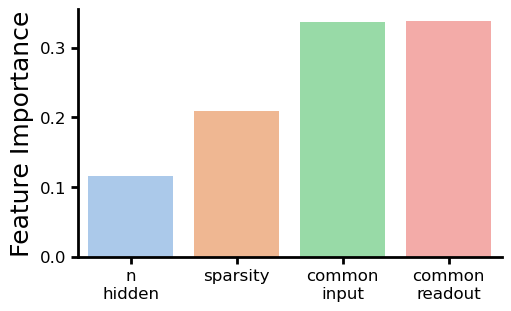

In [78]:
set_style()
plot_data = {}
plot_data["feature"] = [k.replace("_", "\n") for k in feature_importances(rf).keys()]
plot_data["importance"] = list(feature_importances(rf).values())
plot_data = pd.DataFrame.from_dict(plot_data)

fig, ax = plt.subplots(figsize=(5, 3), constrained_layout=True)
sns.barplot(
    plot_data.sort_values(by="importance"),
    x="feature",
    y="importance",
    ax=ax,
    palette="pastel",
)
ax.set_xlabel("")
ax.set_ylabel("Feature Importance")


In [531]:
fig.savefig("../../results/imgs/feature_importance.svg")


## Tables

In [36]:
x, y, metric = *heatmap_params[::2], "retraining_global_diff"

In [40]:
data = filter_data(total_data, {"Step": "last", "common_input": False})


In [62]:
x_values = data[x].unique()[::-1]
y_values = data[y].unique()
y_values_per_x = data.groupby(x)[y].unique()
grouped_values = data.groupby([x, y])[metric].mean()

z_dict = [
    {(xv, yv): grouped_values[xv][yv] for yv in y_values_per_x[xv]} for xv in x_values
]

In [68]:
z = pd.concat([grouped_values[x] for x in x_values], axis=1)
z.columns = x_values
z = z[sorted(x_values)]


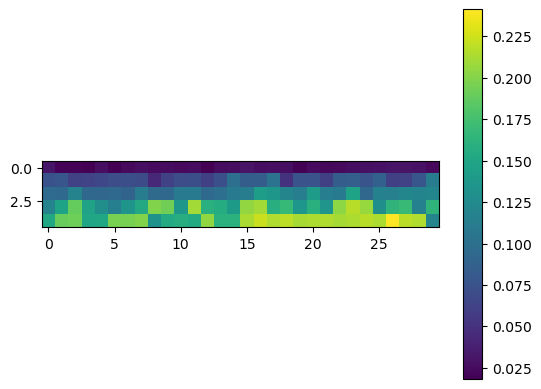

In [72]:
import seaborn as sns

plt.imshow(z, data=z)
plt.colorbar()


In [47]:
x_values

array([ 68,  37,  34, 100,  47,  13,  44,  16,  31,  96,  10,  59,  90,
        41,  93,  25,  78,  50,  22,  81,  87,  84,  56,  65,  19,  62,
        72,  28,  53,  75])

In [142]:
y_values_per_x


n_hidden
10          [1.0, 0.75, 0.5, 0.25]
25          [1.0, 0.75, 0.5, 0.25]
50          [1.0, 0.75, 0.5, 0.25]
75     [1.0, 0.75, 0.5, 0.25, 0.0]
100    [1.0, 0.75, 0.5, 0.25, 0.0]
Name: cov_ratio, dtype: object

### Specialization Gradient

In [15]:
def get_spec_gradient(**v_params):

    if v_params["n_hidden"] not in total_data["n_hidden"].unique():
        return

    v_params.pop("Step")
    print(v_params)
    ags = ["Ag 0", "Readout", "Ag 1"]
    data = filter_data(total_data, v_params)
    data_per_ts = [filter_data(data, {"Step": ts}) for ts in ["mid-", "last"]]
    data_per_ag_mean = [
        [data[[f"bottleneck_{ag}_local_diff"]] for ag in [0, "all", 1]]
        for data in data_per_ts
    ]

    diffs_ag_ts = {
        f"{ags[j]} ts {i}": data_per_ag_mean[i][j].values.squeeze()
        for i, j in [[0, 0], [1, 0], [1, 1], [1, 2], [0, 2]]
    }

    diffs_ag_ts = pd.DataFrame.from_dict(diffs_ag_ts)
    diffs_ag_ts["sparsity"] = data_per_ts[0]["sparsity"].values.squeeze()

    fig, ax = plt.subplots(figsize=(10, 5), dpi=100, constrained_layout=True)
    plot_data = data = diffs_ag_ts.groupby("sparsity").mean()
    colors = sns.color_palette(
        "husl", n_colors=len(plot_data.index.values)
    )  # get a number of colors
    cmap = dict(zip(plot_data.index.values, colors))  # zip values to colors
    plot = sns.lineplot(plot_data.T, legend=False, palette=cmap, ax=ax)

    sm = plt.cm.ScalarMappable(cmap=sns.husl_palette(as_cmap=True))
    sm.set_array([])
    fig.colorbar(sm, label="% interconnections", orientation="vertical", ax=ax)

    ax.set_xticklabels(
        [
            f"{ 'Ag' * (ag != 'Readout')} {ag} Step {t}"
            for t, ag in [[0, 0], [1, 0], [1, "Readout"], [1, 1], [0, 1]]
        ]
    )
    ax.set_ylim(-1, 1)
    ax.set_ylabel("Functional \n Specialization")
    ax.set_yticks([-1, 0, 1], ["Subtask 1", "No Spec", "Subtask 0"])

    ax.hlines(0, 0, 4, linestyles="--", colors="black", alpha=0.3)
    ax.vlines(np.arange(5), -1, 1, linestyles="--", colors="black", alpha=0.3)

    fig.show()

In [16]:
params_widgets = {
    k: widgets.Select(
        options=[p for p in params], description=k, disabled=False, value=params[0]
    )
    for k, params in varying_params.items()
}

params_widgets["n_hidden"] = widgets.IntSlider(value=25, min=10, max=100, step=5)

interactive_plot = widgets.interactive(get_spec_gradient, **params_widgets)

display(interactive_plot)

interactive(children=(Select(description='common_readout', options=(True,), value=True), Select(description='n…

In [230]:
{params[0] for k, params in varying_params.items()}

{5, False, True, 'mid-', 'parity-digits'}

### Parameter Importance

In [136]:
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz, plot_tree

In [140]:
[k for k, v in varying_params.items() if len(v) > 1]

['common_readout', 'n_bot', 'common_input', 'Step', 'cov_ratio']

In [149]:
params = [
    "common_readout",
    "n_bot",
    "common_input",
    "task",
    "Step",
    "cov_ratio",
    "n_hidden",
    "sparsity",
]

varying_params = {}
for param in params:
    if param in total_data.columns:
        varying_params[param] = total_data[param].unique().tolist()
        try:
            varying_params[param] = sorted(varying_params[param])
            varying_params[param] = [
                v if not np.isnan(v) else None for v in varying_params[param]
            ]
        except TypeError:
            pass

rf = RF()
metric = metrics[0]
# metric = "best_acc"

all_features = [k for k, v in varying_params.items() if len(v) > 1]

fixed_features = {k: v for k, v in varying_params.items() if len(v) == 1}

fixed_features.update({"Step": "last", "n_bot": 5})

data = total_data
remaining_features = [f for f in all_features if f not in fixed_features]

data = filter_data(data, fixed_features)

X = data[remaining_features]
y = data[metric]

if "task" in remaining_features:
    X["task_bool"] = X["task"] == "all"
    X = X[[f for f in remaining_features if f != "task"] + ["task_bool"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rf.fit(X_train, y_train)

print(np.abs((rf.predict(X_test) - y_test)).mean())

feature_importances = lambda rf: {
    f: f_i for f, f_i in zip(rf.feature_names_in_, rf.feature_importances_)
}


0.03846413042899654


In [150]:
feature_importances(rf)

{'common_readout': 0.08835830398627519,
 'common_input': 0.11556805494836744,
 'cov_ratio': 0.24013192899714103,
 'n_hidden': 0.10968919700068862,
 'sparsity': 0.4462525150675277}

Text(0, 0.5, 'Feature Importance')

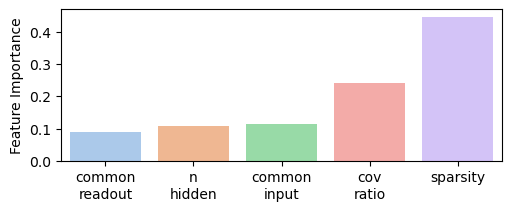

In [174]:
plot_data = {}
plot_data["feature"] = [k.replace("_", "\n") for k in feature_importances(rf).keys()]
plot_data["importance"] = list(feature_importances(rf).values())
plot_data = pd.DataFrame.from_dict(plot_data)

fig, ax = plt.subplots(figsize=(5, 2), constrained_layout=True)
sns.barplot(
    plot_data.sort_values(by="importance"),
    x="feature",
    y="importance",
    ax=ax,
    palette="pastel",
)
ax.set_xlabel("")
ax.set_ylabel("Feature Importance")


In [176]:
5

2.5

In [175]:
fig.savefig("../../results/imgs/feature_importance.svg")


# Find new metric

In [2]:
import numpy as np
import numpy.linalg as LA
from numpy.linalg import LinAlgError


In [8]:
def agent_diff(col):
    return (col[1] - col[0]) / col.sum()


def global_diff(M):
    return np.abs(agent_diff(M[:, 0]) - agent_diff(M[:, 1])) / 2


def new_metric(M):
    return np.abs(LA.det(M)) / M.sum(0).prod()

In [29]:
n_agents = 2

M = np.random.rand(n_agents, n_agents)

M = np.eye(n_agents)
M[0, 1] = 1

new_metric(M), np.abs(LA.det(M))


(0.5, 1.0)

In [128]:
idxs = [0, 2]
sub_mat = lambda M, idx: np.delete(np.delete(M, idx[0], 0), idx[1], 1).squeeze()
sub_mat(M, idxs), M

(array([[0., 1.],
        [0., 0.]]),
 array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]))

In [180]:
def reccursive_new_metric(M):
    if M.shape[0] > 2:

        res = new_metric(M)

        for i in range(M.shape[0]):
            for j in range(M.shape[1]):
                subM = sub_mat(M, [i, j])
                res += reccursive_new_metric(subM)

    else:
        res = new_metric(M)

    print(res)
    return res